In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [3]:
df.shape

(100, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<Axes: xlabel='cgpa', ylabel='resume_score'>

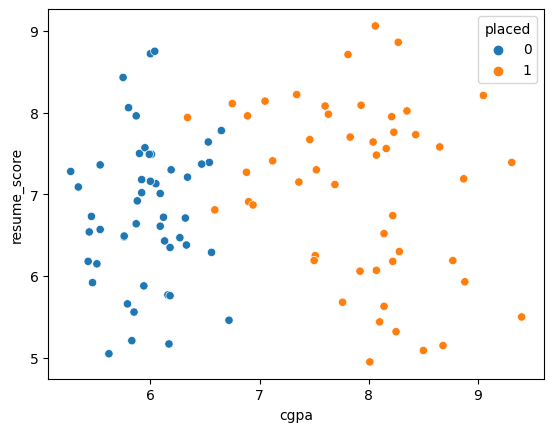

In [5]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
p.fit(X,y)

Perceptron()

In [9]:
p.coef_

array([[ 40.26, -36.  ]])

In [10]:
p.intercept_

array([-25.])

In [11]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Jitesh Mahariya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

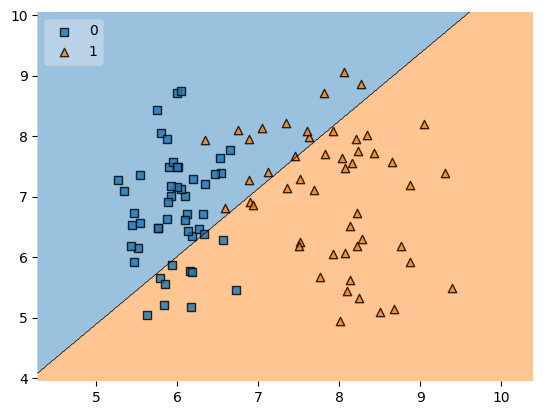

In [12]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

# perceptron mathematical implementation

In [13]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [14]:
import matplotlib.pyplot as plt

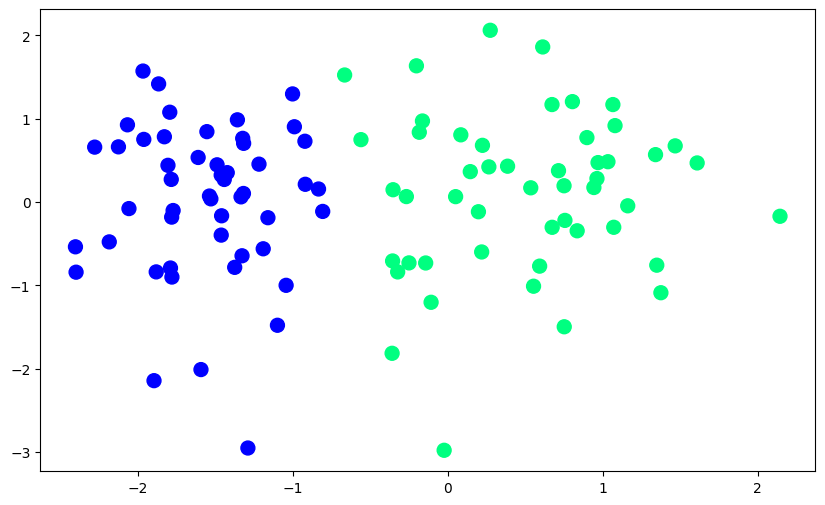

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [16]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)  #add bias as 1
    weights = np.ones(X.shape[1]) #create an array like (1,1,1)
    lr = 0.1 #learning rate
    
    for i in range(1000):
        j = np.random.randint(0,100) # select an random point 
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]  # intercept and cof. (return W0 and W1,W2)

In [17]:
def step(z):
    return 1 if z>0 else 0

In [18]:
intercept_,coef_ = perceptron(X,y)

In [19]:
print(coef_) 
print(intercept_)

[1.37061217 0.10746666]
0.8


In [20]:
m = -(coef_[0]/coef_[1])   #m = -(A/B)  eq.=Ax+By+C
b = -(intercept_/coef_[1]) #b = -(C/B)

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

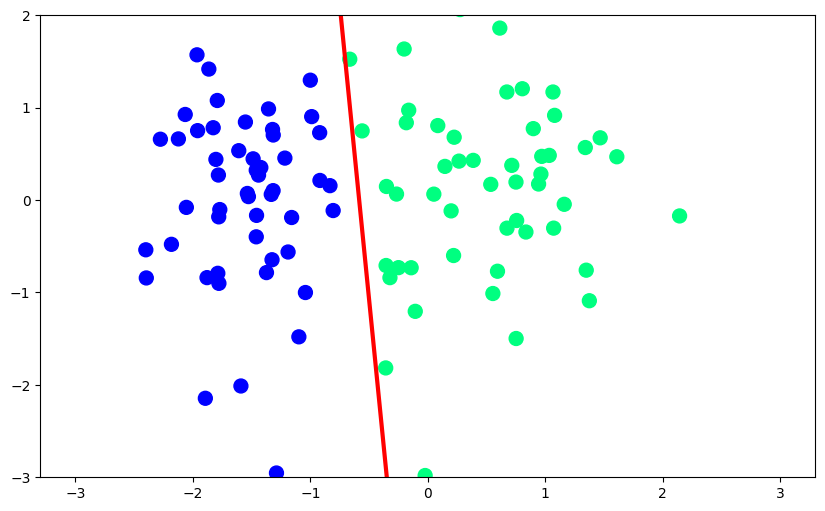

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)